In [4]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
import seaborn as sns
sns.set_theme()

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# from google.colab import drive
# drive.mount('/content/drive')

In [8]:
# Houses = pd.read_csv("/content/drive/My Drive/ICT - AI/Study Units/ARI5102 - Data Analysis Techniques/4. Generalized Linear Models/Houses.dat", sep='\s+|\s+')
Houses =pd.read_csv('Houses.dat', sep='\s+|\s+')
Houses.head(10)

C:\Users\carme\AppData\Local\Temp\ipykernel_8452\67374564.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  Houses =pd.read_csv('Houses.dat', sep='\s+|\s+')


,case,price,size,new,taxes,bedrooms,baths
0,1,419.85,2048,0,3104,4,2
1,2,219.75,912,0,1173,2,1
2,3,356.55,1654,0,3076,4,2
3,4,300.00,2068,0,1608,3,2
4,5,239.85,1477,0,1454,3,3
5,6,749.85,3153,1,2997,3,2
6,7,398.25,1355,0,4054,3,2
7,8,434.85,2075,1,3002,3,2
8,9,880.50,3990,0,6627,5,4
9,10,105.00,1160,0,320,3,2


f:\work\masters-ai\ari5102\.venv\lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


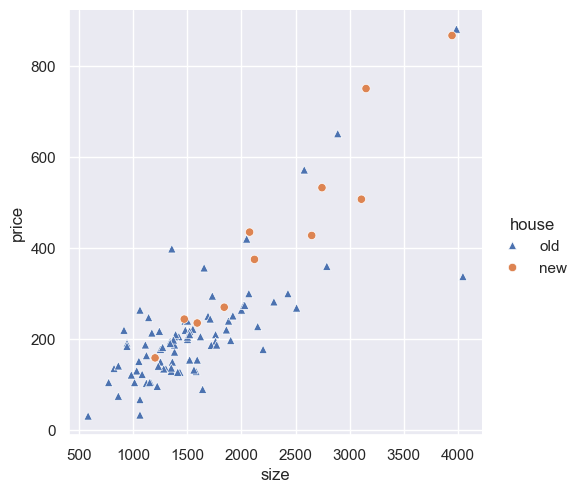

In [9]:
Houses['house'] = Houses['new'].apply(lambda x: 'old' if x==0 else 'new')
sns.pairplot(x_vars=['size'], y_vars=['price'], data=Houses, hue='house', size=5, markers=['^', 'o'])

In [10]:
fit1 = smf.glm(formula = 'price ~ size + new + size:new', data = Houses,
               family = sm.families.Gaussian()).fit()
print(fit1.summary())
print('Null deviance is {:.1f}'.format(fit1.null_deviance))
print('Residual deviance is {:.1f}'.format(fit1.deviance))
print('AIC is {:.1f}'.format(fit1.aic))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  price   No. Observations:                  100
Model:                            GLM   Df Residuals:                       96
Model Family:                Gaussian   Df Model:                            3
Link Function:               Identity   Scale:                          6083.6
Method:                          IRLS   Log-Likelihood:                -575.52
Date:                Sun, 18 May 2025   Deviance:                   5.8402e+05
Time:                        18:19:37   Pearson chi2:                 5.84e+05
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9389
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -33.3417     23.282     -1.432      0.1

In [11]:
gamma_mod = smf.glm(formula = 'price ~ size + new + size:new', data = Houses, 
                    family = sm.families.Gamma(sm.families.links.identity()))
fit2 = gamma_mod.fit()
print(fit2.summary())
print('Null deviance is {:.1f}'.format(fit2.null_deviance))
print('Residual deviance is {:.1f}'.format(fit2.deviance))
print('AIC is {:.1f}'.format(fit2.aic))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  price   No. Observations:                  100
Model:                            GLM   Df Residuals:                       96
Model Family:                   Gamma   Df Model:                            3
Link Function:               identity   Scale:                         0.11020
Method:                          IRLS   Log-Likelihood:                -559.60
Date:                Sun, 18 May 2025   Deviance:                       10.563
Time:                        18:19:40   Pearson chi2:                     10.6
No. Iterations:                    11   Pseudo R-squ. (CS):             0.8563
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.1764     19.461     -0.574      0.5

f:\work\masters-ai\ari5102\.venv\lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(
f:\work\masters-ai\ari5102\.venv\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:308: DomainWarning: The identity link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


In [ ]:
Covid = pd.read_csv("/content/drive/My Drive/ICT - AI/Study Units/ARI5102 - Data Analysis Techniques/4. Generalized Linear Models/Covid19.dat", sep='\s+|\s+')


<ipython-input-7-d7ed36c61807>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  Covid = pd.read_csv("/content/drive/My Drive/ICT - AI/Study Units/ARI5102 - Data Analysis Techniques/4. Generalized Linear Models/Covid19.dat", sep='\s+|\s+')


In [ ]:
fit1 = smf.ols(formula='np.log(cases) ~ day', data=Covid).fit()
print(fit1.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(cases)   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     4540.
Date:                Wed, 29 Mar 2023   Prob (F-statistic):           2.02e-33
Time:                        11:14:24   Log-Likelihood:                 2.8442
No. Observations:                  31   AIC:                            -1.688
Df Residuals:                      29   BIC:                             1.180
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8439      0.084     33.850      0.0

In [ ]:
fit2 = smf.glm(formula = 'cases ~ day', family = sm.families.Gaussian(link = sm.families.links.log()), data = Covid).fit()
print(fit2.summary())
print('AIC is {:.1f}'.format(fit2.aic))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  cases   No. Observations:                   31
Model:                            GLM   Df Residuals:                       29
Model Family:                Gaussian   Df Model:                            1
Link Function:                    log   Scale:                      1.1565e+07
Method:                          IRLS   Log-Likelihood:                -295.07
Date:                Wed, 29 Mar 2023   Deviance:                   3.3540e+08
Time:                        11:14:24   Pearson chi2:                 3.35e+08
No. Iterations:                     9   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.3159      0.168     31.703      0.0

In [ ]:
fit3 = smf.glm(formula = 'cases ~ day', family = sm.families.Gamma(link = sm.families.links.log()), data = Covid).fit()
print(fit3.summary())
print('AIC is {:.1f}'.format(fit3.aic))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  cases   No. Observations:                   31
Model:                            GLM   Df Residuals:                       29
Model Family:                   Gamma   Df Model:                            1
Link Function:                    log   Scale:                        0.044082
Method:                          IRLS   Log-Likelihood:                -237.69
Date:                Wed, 29 Mar 2023   Deviance:                       1.4239
Time:                        11:14:24   Pearson chi2:                     1.28
No. Iterations:                    18   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8572      0.077     36.972      0.0

In [ ]:
Beetles = pd.read_csv("/content/drive/My Drive/ICT - AI/Study Units/ARI5102 - Data Analysis Techniques/4. Generalized Linear Models/Beetles.dat", sep='\s+|\s+')
Beetles.head(8)

<ipython-input-11-ce8641ca7522>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  Beetles = pd.read_csv("/content/drive/My Drive/ICT - AI/Study Units/ARI5102 - Data Analysis Techniques/4. Generalized Linear Models/Beetles.dat", sep='\s+|\s+')


,logdose,live,dead,n
0,1.691,53,6,59
1,1.724,47,13,60
2,1.755,44,18,62
3,1.784,28,28,56
4,1.811,11,52,63
5,1.837,6,53,59
6,1.861,1,61,62
7,1.884,0,60,60


In [ ]:
fit = smf.glm('dead + live ~ logdose', data = Beetles ,family = sm.families.Binomial()).fit()
print(fit.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:       ['dead', 'live']   No. Observations:                    8
Model:                            GLM   Df Residuals:                        6
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18.657
Date:                Wed, 29 Mar 2023   Deviance:                       11.116
Time:                        11:14:24   Pearson chi2:                     9.91
No. Iterations:                     6   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -60.7401      5.182    -11.722      0.0

In [ ]:
Beetles = pd.read_csv("/content/drive/My Drive/ICT - AI/Study Units/ARI5102 - Data Analysis Techniques/4. Generalized Linear Models/Beetles_ungrouped.dat", sep='\s+|\s+')

<ipython-input-13-6581ddc9603c>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  Beetles = pd.read_csv("/content/drive/My Drive/ICT - AI/Study Units/ARI5102 - Data Analysis Techniques/4. Generalized Linear Models/Beetles_ungrouped.dat", sep='\s+|\s+')


In [ ]:
fit = smf.glm('y ~ x', family = sm.families.Binomial(), data=Beetles).fit()
print(fit.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  481
Model:                            GLM   Df Residuals:                      479
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -186.18
Date:                Wed, 29 Mar 2023   Deviance:                       372.35
Time:                        11:14:25   Pearson chi2:                     436.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4332
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -60.7401      5.182    -11.722      0.0

[Text(0.5, 0, 'x'), Text(0, 0.5, 'P(Y=1)')]

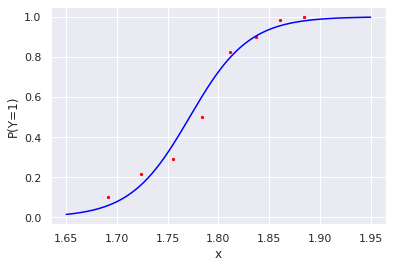

In [ ]:
logdose = Beetles.x.unique()
yx=pd.crosstab(Beetles['y'],Beetles['x'], normalize='columns')
y_prop=yx.iloc[1]
def f(t):
  return np.exp(fit.params[0] + fit.params[1]*t)/(1 + np.exp(fit.params[0] + fit.params[1]*t))

t1 = np.arange(1.65, 1.95, 0.0001)
fig, ax = plt.subplots()
ax.plot(t1, f(t1),'blue')
ax.scatter(logdose, y_prop, s=5, color='red')
ax.set(xlabel='x', ylabel='P(Y=1)')

In [ ]:
toy = pd.DataFrame({'x': [1,2,3,4,5,6], 'y': [0,0,0,1,1,1]})
fit = smf.glm('y ~ x', family = sm.families.Binomial(), data=toy).fit()
print(fit.summary())

PerfectSeparationError: ignored

In [ ]:
toy = pd.DataFrame({'x': [1,2,3,3,4,5,6], 'y': [0,0,0,1,1,1,1]})
fit = smf.glm('y ~ x', family = sm.families.Binomial(), data=toy).fit()
print(fit.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                    7
Model:                            GLM   Df Residuals:                        5
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1.3863
Date:                Wed, 29 Mar 2023   Deviance:                       2.7726
Time:                        11:14:37   Pearson chi2:                     2.00
No. Iterations:                    21   Pseudo R-squ. (CS):             0.6208
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -61.7833   3.81e+04     -0.002      0.9

In [ ]:
Crabs = pd.read_csv("/content/drive/My Drive/ICT - AI/Study Units/ARI5102 - Data Analysis Techniques/4. Generalized Linear Models/Crabs.dat", sep='\s+|\s+')
Crabs.head(10)

<ipython-input-18-94e865936843>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  Crabs = pd.read_csv("/content/drive/My Drive/ICT - AI/Study Units/ARI5102 - Data Analysis Techniques/4. Generalized Linear Models/Crabs.dat", sep='\s+|\s+')


,crab,sat,y,weight,width,color,spine
0,1,8,1,3.05,28.3,2,3
1,2,0,0,1.55,22.5,3,3
2,3,9,1,2.30,26.0,1,1
3,4,0,0,2.10,24.8,3,3
4,5,4,1,2.60,26.0,3,3
5,6,0,0,2.10,23.8,2,3
6,7,0,0,2.35,26.5,1,1
7,8,0,0,1.90,24.7,3,2
8,9,0,0,1.95,23.7,2,1
9,10,0,0,2.15,25.6,3,3


In [ ]:
fit = smf.glm('sat ~ weight + C(color)',family=sm.families.Poisson(), data=Crabs).fit()
print(fit.summary())  
print('AIC is {:.1f}'.format(fit.aic))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    sat   No. Observations:                  173
Model:                            GLM   Df Residuals:                      168
Model Family:                 Poisson   Df Model:                            4
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -453.55
Date:                Wed, 29 Mar 2023   Deviance:                       551.80
Time:                        11:14:44   Pearson chi2:                     535.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3738
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.0498      0.233     -0.214

In [ ]:
Cancer = pd.read_csv("/content/drive/My Drive/ICT - AI/Study Units/ARI5102 - Data Analysis Techniques/4. Generalized Linear Models/Cancer.dat", sep='\s+|\s+')
Cancer.head(10)

<ipython-input-20-724627a8fa83>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  Cancer = pd.read_csv("/content/drive/My Drive/ICT - AI/Study Units/ARI5102 - Data Analysis Techniques/4. Generalized Linear Models/Cancer.dat", sep='\s+|\s+')


,time,stage,deaths,risktime
0,1,1,15,255
1,2,1,5,224
2,3,1,13,203
3,4,1,13,169
4,5,1,3,148
5,6,1,6,135
6,7,1,3,124
7,1,2,17,227
8,2,2,11,191
9,3,2,13,168


In [ ]:
logrisktime = np.log(Cancer.risktime)
fit = smf.glm('deaths ~ C(stage) + C(time)',
              family = sm.families.Poisson(), offset = logrisktime, data = Cancer).fit()
print(fit.summary())    

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 deaths   No. Observations:                   21
Model:                            GLM   Df Residuals:                       12
Model Family:                 Poisson   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -52.270
Date:                Wed, 29 Mar 2023   Deviance:                       14.997
Time:                        11:14:51   Pearson chi2:                     14.6
No. Iterations:                     5   Pseudo R-squ. (CS):             0.9979
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -2.9414      0.158    -18.587

In [ ]:
mean_sat = round(np.mean(Crabs.sat), 4) 
var_sat = round(np.var(Crabs.sat), 4) 
print('The mean number of satellites is {:.4f}'.format(mean_sat))
print('The variance of the number of satellites is {:.4f}'.format(var_sat))  

The mean number of satellites is 2.9191
The variance of the number of satellites is 9.8547


In [ ]:
from statsmodels.discrete.discrete_model import NegativeBinomial
model = NegativeBinomial.from_formula('sat ~ weight + C(color)', data = Crabs, loglike_method='nb2')
fit_dispersion = model.fit()
print(fit_dispersion.summary())
print('AIC is {:.1f}'.format(fit_dispersion.aic))

Optimization terminated successfully.
         Current function value: 2.155882
         Iterations: 24
         Function evaluations: 27
         Gradient evaluations: 27
                     NegativeBinomial Regression Results                      
Dep. Variable:                    sat   No. Observations:                  173
Model:               NegativeBinomial   Df Residuals:                      168
Method:                           MLE   Df Model:                            4
Date:                Wed, 29 Mar 2023   Pseudo R-squ.:                 0.02798
Time:                        11:14:56   Log-Likelihood:                -372.97
converged:                       True   LL-Null:                       -383.70
Covariance Type:            nonrobust   LLR p-value:                 0.0002550
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.4263      0.

In [ ]:
Students=pd.read_csv('/content/drive/My Drive/ICT - AI/Study Units/ARI5102 - Data Analysis Techniques/4. Generalized Linear Models/Students.dat',sep='\s+')
Students.head(10)     

,subject,gender,age,hsgpa,cogpa,dhome,dres,tv,sport,news,aids,veg,affil,ideol,relig,abor,affirm,life
0,1,0,32,2.2,3.5,0,5.0,3.0,5,0,0,0,2,6,2,0,0,1
1,2,1,23,2.1,3.5,1200,0.3,15.0,7,5,6,1,1,2,1,1,1,3
2,3,1,27,3.3,3.0,1300,1.5,0.0,4,3,0,1,1,2,2,1,1,3
3,4,1,35,3.5,3.2,1500,8.0,5.0,5,6,3,0,3,4,1,1,1,2
4,5,0,23,3.1,3.5,1600,10.0,6.0,6,3,0,0,3,1,0,1,0,2
5,6,0,39,3.5,3.5,350,3.0,4.0,5,7,0,1,1,2,1,1,1,3
6,7,0,24,3.6,3.7,0,0.2,5.0,12,4,2,0,3,2,1,1,1,1
7,8,1,31,3.0,3.0,5000,1.5,5.0,3,3,1,0,3,2,1,1,1,1
8,9,0,34,3.0,3.0,5000,2.0,7.0,5,3,0,0,3,1,1,1,1,3
9,10,0,28,4.0,3.1,900,2.0,1.0,1,2,1,1,3,3,0,0,1,1


In [ ]:
fit = smf.glm('abor ~ gender + age + hsgpa + cogpa + dhome + dres + tv + sport + news + aids + veg + ideol + relig + affirm', 
              family = sm.families.Binomial(), data=Students).fit()
print(fit.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   abor   No. Observations:                   60
Model:                            GLM   Df Residuals:                       45
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10.684
Date:                Wed, 29 Mar 2023   Deviance:                       21.368
Time:                        11:15:03   Pearson chi2:                     19.5
No. Iterations:                     9   Pseudo R-squ. (CS):             0.4980
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.1014     10.891      0.927      0.3

In [ ]:
y = Students.abor
x = Students.drop(['subject', 'abor', 'life', 'affil'], axis = 1).astype('float64')

scaler = StandardScaler()
x = scaler.fit_transform(x)

clf = LogisticRegression(penalty='l1', C=0.15, solver='liblinear', max_iter=10000).fit(x, y)
print('Intercept is {:.4f}'.format(clf.intercept_[0]))
print('gender: {:.4f} \t age: {:.4f} \t hsgpa: {:.4f}'.format(clf.coef_[0][0], clf.coef_[0][1], clf.coef_[0][2]))
print('cogpa: {:.4f} \t dhome: {:.4f} \t dres: {:.4f}'.format(clf.coef_[0][3], clf.coef_[0][4], clf.coef_[0][5]))
print('tv: {:.4f} \t sport: {:.4f} \t news: {:.4f}'.format(clf.coef_[0][6], clf.coef_[0][7], clf.coef_[0][8]))
print('aids: {:.4f} \t veg: {:.4f} \t ideol: {:.4f}'.format(clf.coef_[0][9], clf.coef_[0][10], clf.coef_[0][11]))
print('relig: {:.4f} \t affirm: {:.4f}'.format(clf.coef_[0][12], clf.coef_[0][13]))

Intercept is 0.7564
gender: 0.0000 	 age: 0.0000 	 hsgpa: 0.0000
cogpa: 0.0000 	 dhome: 0.0000 	 dres: 0.0000
tv: 0.0000 	 sport: 0.0000 	 news: 0.0000
aids: 0.0000 	 veg: 0.0000 	 ideol: -0.3843
relig: -0.1905 	 affirm: 0.0000


In [ ]:
clf = LogisticRegression(penalty='l2', C=0.01, max_iter=10000).fit(x, y)
print('Intercept is {:.4f}'.format(clf.intercept_[0]))
print('gender: {:.4f} \t age: {:.4f} \t hsgpa: {:.4f}'.format(clf.coef_[0][0], clf.coef_[0][1], clf.coef_[0][2]))
print('cogpa: {:.4f} \t dhome: {:.4f} \t dres: {:.4f}'.format(clf.coef_[0][3], clf.coef_[0][4], clf.coef_[0][5]))
print('tv: {:.4f} \t sport: {:.4f} \t news: {:.4f}'.format(clf.coef_[0][6], clf.coef_[0][7], clf.coef_[0][8]))
print('aids: {:.4f} \t veg: {:.4f} \t ideol: {:.4f}'.format(clf.coef_[0][9], clf.coef_[0][10], clf.coef_[0][11]))
print('relig: {:.4f} \t affirm: {:.4f}'.format(clf.coef_[0][12], clf.coef_[0][13]))

Intercept is 1.3039
gender: 0.0281 	 age: -0.0016 	 hsgpa: -0.0091
cogpa: 0.0150 	 dhome: 0.0287 	 dres: -0.0257
tv: 0.0419 	 sport: -0.0149 	 news: 0.0650
aids: 0.0047 	 veg: 0.0207 	 ideol: -0.1103
relig: -0.1010 	 affirm: 0.0568
